In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import seaborn as sns

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# remove null values
data['Glucose'] = data['Glucose'].replace(0,np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0,np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0,np.nan)
data['Insulin'] = data['Insulin'].replace(0,np.nan)
data['BMI'] = data['BMI'].replace(0,np.nan)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [41]:
# mean and stardard deviation for attibute for 2-6
print('Mean for Glucose:',data.loc[:,'Glucose'].mean())
print('Mean for Blood Pressure:',data.loc[:,'BloodPressure'].mean())
print('Mean for Skin Thickness:',data.loc[:,'SkinThickness'].mean())
print('Mean for Insulin:',data.loc[:,'Insulin'].mean())
print('Mean for BMI:',data.loc[:,'BMI'].mean())
print('')
print('Standard Deviation for Glucose:',data.loc[:,'Glucose'].std())
print('Standard Deviation for Blood Pressure:',data.loc[:,'BloodPressure'].std())
print('Standard Deviation for Skin Thickness:',data.loc[:,'SkinThickness'].std())
print('Standard Deviation for Insulin:',data.loc[:,'Insulin'].std())
print('Standard Deviation for BMI:',data.loc[:,'BMI'].std())


Mean for Glucose: 121.6867627785059
Mean for Blood Pressure: 72.40518417462484
Mean for Skin Thickness: 29.153419593345657
Mean for Insulin: 155.5482233502538
Mean for BMI: 32.45746367239099

Standard Deviation for Glucose: 30.53564107280403
Standard Deviation for Blood Pressure: 12.382158210105263
Standard Deviation for Skin Thickness: 10.476982369987212
Standard Deviation for Insulin: 118.77585518724514
Standard Deviation for BMI: 6.924988332105907


In [42]:
# Finding the covarience
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].cov()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,932.425376,84.811985,74.025750,2127.014566,49.355133
BloodPressure,84.811985,153.317842,29.240422,145.553584,24.644988
SkinThickness,74.025750,29.240422,109.767160,230.676780,46.725661
Insulin,2127.014566,145.553584,230.676780,14107.703775,190.422831
BMI,49.355133,24.644988,46.725661,190.422831,47.955463


In [43]:
# Finding the correlation for 10 pairs and 5 attributes
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
Glucose,1.000000,0.223192,0.228043,0.581186,0.232771
BloodPressure,0.223192,1.000000,0.226839,0.098272,0.289230
SkinThickness,0.228043,0.226839,1.000000,0.184888,0.648214
Insulin,0.581186,0.098272,0.184888,1.000000,0.228050
BMI,0.232771,0.289230,0.648214,0.228050,1.000000


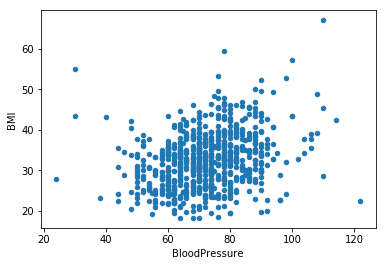

In [44]:
# Scatter plot of attributes 3 and 6
plot1 = data.plot.scatter(x='BloodPressure',
                         y='BMI')

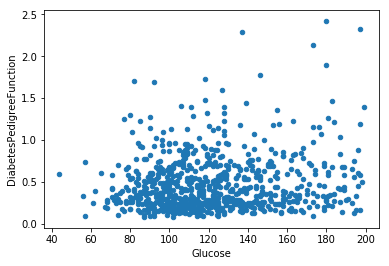

In [45]:
# Scatter plot for attributes 2 and 7
plot2 = data.plot.scatter(x='Glucose',
                         y='DiabetesPedigreeFunction')

Text(0, 0.5, 'Frequency')

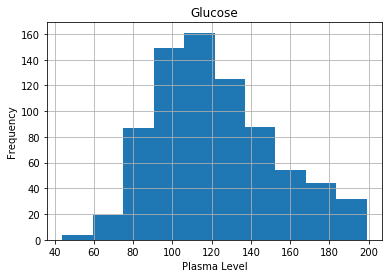

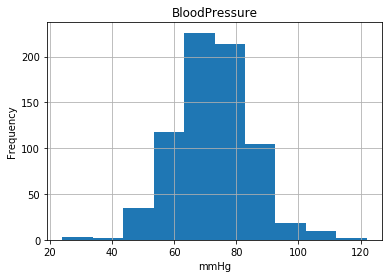

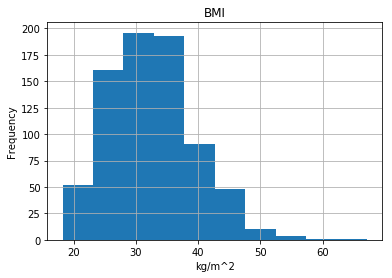

In [46]:
# Histgrams for attributes 2,3 and 6
hist1 = data.hist(column=['Glucose'])
plt.xlabel("Plasma Level")
plt.ylabel("Frequency")
hist2 = data.hist(column=['BloodPressure'])
plt.xlabel("mmHg")
plt.ylabel("Frequency")
hist3 = data.hist(column=['BMI'])
plt.xlabel("kg/m^2")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

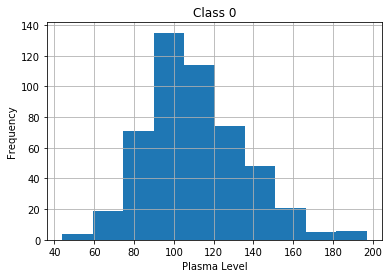

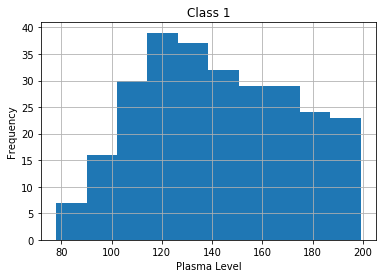

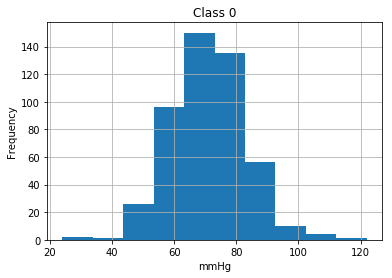

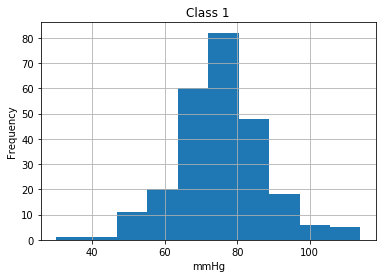

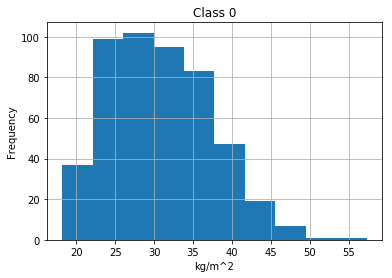

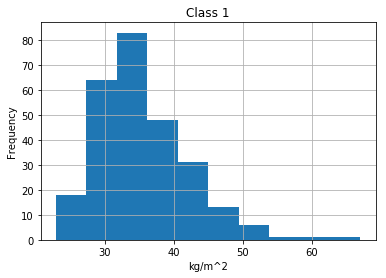

In [47]:
# Create histograms for 3 attributes of class 1 and class 0
hist4 = data[data['Outcome']==0].hist(column=['Glucose'])
plt.title('Class 0')
plt.xlabel("Plasma Level")
plt.ylabel("Frequency")
hist4 = data[data['Outcome']==1].hist(column=['Glucose'])
plt.title('Class 1')
plt.xlabel("Plasma Level")
plt.ylabel("Frequency")
print('')
hist5 = data[data['Outcome']==0].hist(column=['BloodPressure'])
plt.title('Class 0')
plt.xlabel("mmHg")
plt.ylabel("Frequency")
hist5 = data[data['Outcome']==1].hist(column=['BloodPressure'])
plt.title('Class 1')
plt.xlabel("mmHg")
plt.ylabel("Frequency")
print('')
hist6 = data[data['Outcome']==0].hist(column=['BMI'])
plt.title('Class 0')
plt.xlabel("kg/m^2")
plt.ylabel("Frequency")
hist6 = data[data['Outcome']==1].hist(column=['BMI'])
plt.title('Class 1')
plt.xlabel("kg/m^2")
plt.ylabel("Frequency")

Text(0, 0.5, 'Plasma Level')

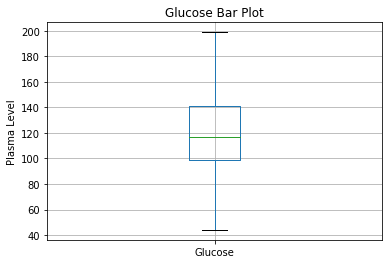

In [48]:
bar1 = data.boxplot(column=['Glucose'])
plt.title('Glucose Bar Plot')
plt.ylabel('Plasma Level')

Text(0, 0.5, 'Plasma Level')

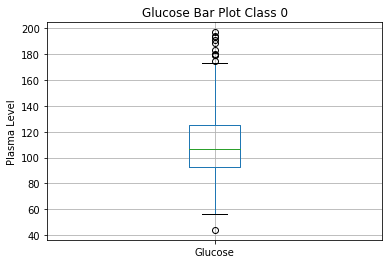

In [49]:
bar2 = data[data['Outcome']==0].boxplot(column=['Glucose'])
plt.title('Glucose Bar Plot Class 0')
plt.ylabel('Plasma Level')

Text(0, 0.5, 'Plasma Level')

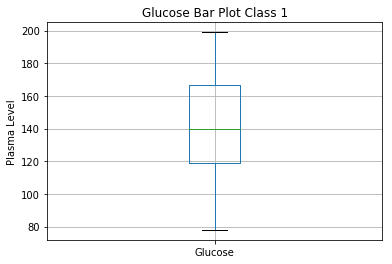

In [50]:
bar3 = data[data['Outcome']==1].boxplot(column=['Glucose'])
plt.title('Glucose Bar Plot Class 1')
plt.ylabel('Plasma Level')

Text(0.5, 1.0, 'Diabetes Pedigree Function')

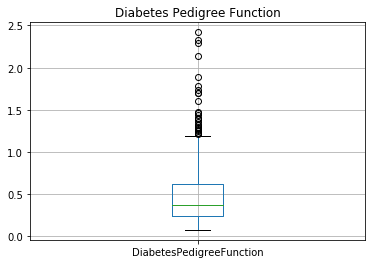

In [51]:
bar4 = data.boxplot(column=['DiabetesPedigreeFunction'])
plt.title('Diabetes Pedigree Function')

Text(0.5, 1.0, 'Diabetes Pedigree Function Class 0')

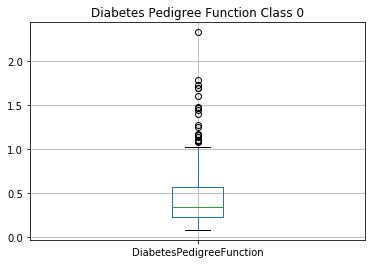

In [52]:
bar5 = data[data['Outcome']==0].boxplot(column=['DiabetesPedigreeFunction'])
plt.title('Diabetes Pedigree Function Class 0')

Text(0.5, 1.0, 'Diabetes Pedigree Function Class 1')

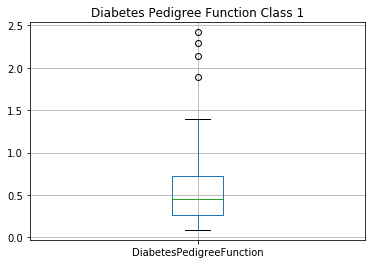

In [53]:
bar6 = data[data['Outcome']==1].boxplot(column=['DiabetesPedigreeFunction'])
plt.title('Diabetes Pedigree Function Class 1')

Text(0, 0.5, 'Years')

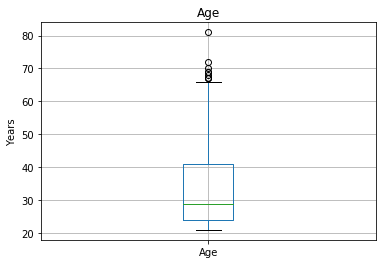

In [54]:
bar7 = data.boxplot(column=['Age'])
plt.title('Age')
plt.ylabel('Years')

Text(0, 0.5, 'Years')

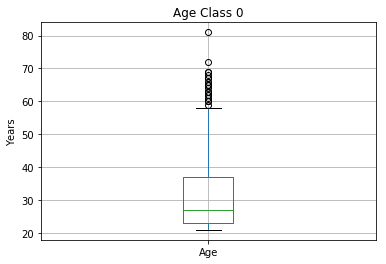

In [55]:
bar8 = data[data['Outcome']==0].boxplot(column=['Age'])
plt.title('Age Class 0')
plt.ylabel('Years')

Text(0, 0.5, 'Years')

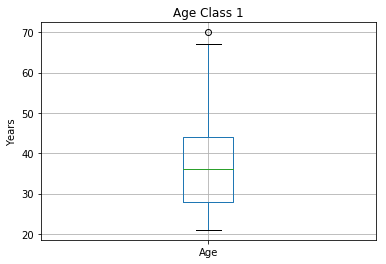

In [33]:
bar9 = data[data['Outcome']==1].boxplot(column=['Age'])
plt.title('Age Class 1')
plt.ylabel('Years')

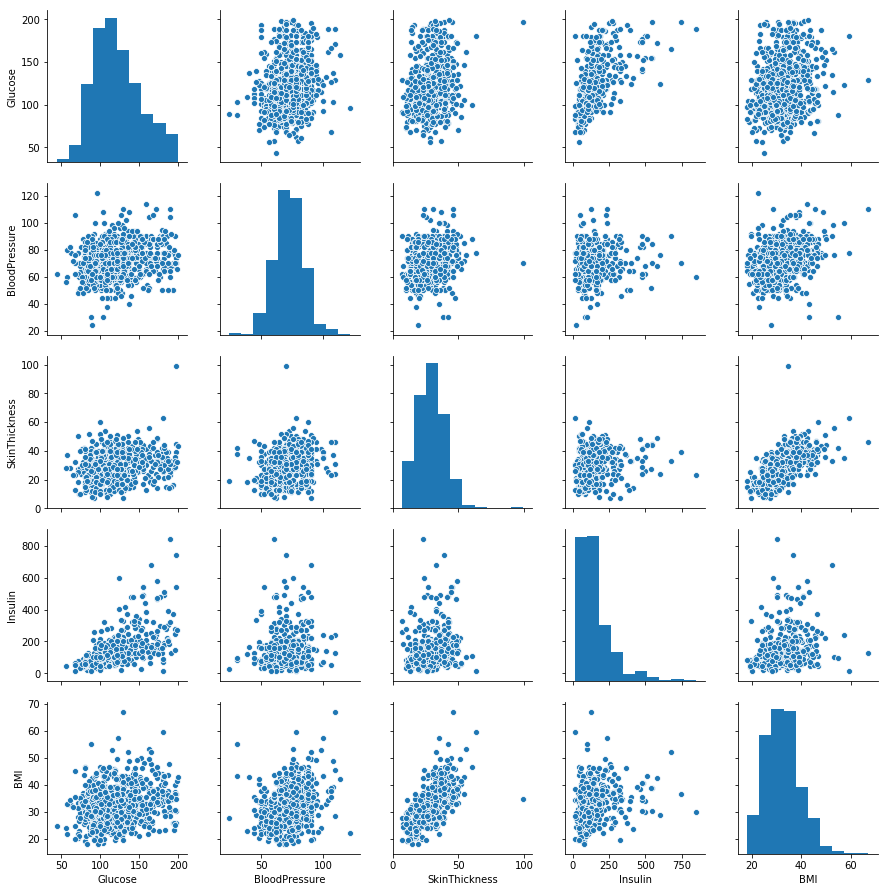

In [66]:
sns.pairplot(data,vars=data.columns[1:6])

Text(0.5, 0, 'kg/m^2 axis')

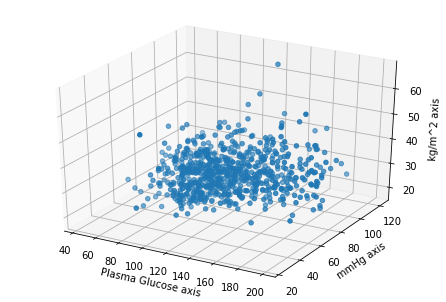

In [37]:
# create two 3D scatter plots for 2,3,6 and 2,4,6
fig = plt.figure()
scatter3d = Axes3D(fig)
scatter3d.scatter(data['Glucose'],data['BloodPressure'],data['BMI'])
scatter3d.set_xlabel('Plasma Glucose axis')
scatter3d.set_ylabel('mmHg axis')
scatter3d.set_zlabel('kg/m^2 axis')

Text(0.5, 0, 'kg/m^2 axis')

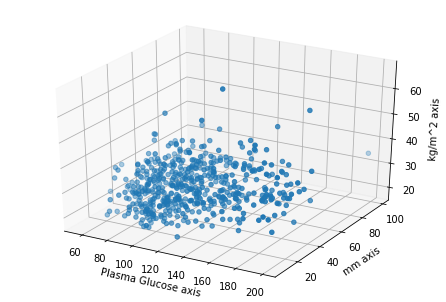

In [38]:
fig = plt.figure()
scatter3d = Axes3D(fig)
scatter3d.scatter(data['Glucose'],data['SkinThickness'],data['BMI'])
scatter3d.set_xlabel('Plasma Glucose axis')
scatter3d.set_ylabel('mm axis')
scatter3d.set_zlabel('kg/m^2 axis')

In [34]:
# Fit a linear regression which fits the class attribute and reports the R^2 values
data1 = pd.read_csv('diabetes.csv')
mlr_x = data1[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
mlr_y = data1['Outcome']
model = sm.OLS(mlr_y,mlr_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     90.10
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          9.04e-105
Time:                        21:37:57   Log-Likelihood:                -429.34
No. Observations:                 768   AIC:                             874.7
Df Residuals:                     760   BIC:                             911.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0247      0.005      4.536      0.000       0.014       0.035
Glucose                      0.0039      0.001      7.701      0.000       0.003       0.005
BloodPressure               -0.0049      0.001     -6.005      0.000      -0.007      -0.003
SkinThickness             5.752e-05      0.001      0.049      0.961      -0.002       0.002
Insulin                   4.783e-05      0.000      0.304      0.761      -0.000       0.000
BMI                          0.0042      0.002      2.094      0.037       0.000       0.008
DiabetesPedigreeFunction     0.0980      0.048      2.059      0.040       0.005       0.191
Age                         -0.0010      0.002     -0.652      0.515      -0.004       0.002
==============================================================================
Omnibus:                      294.015   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.012
Skew:                           0.574   Prob(JB):                     4.22e-18
Kurtosis:                       1.913   Cond. No.                         575.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Drop two values that have the closest coeffcients
mlr_x = data1[["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"]]
mlr_y = data1['Outcome']
model = sm.OLS(mlr_y,mlr_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          7.98e-107
Time:                        21:37:58   Log-Likelihood:                -429.40
No. Observations:                 768   AIC:                             870.8
Df Residuals:                     762   BIC:                             898.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0246      0.005      4.531      0.000       0.014       0.035
Glucose                      0.0039      0.000      8.221      0.000       0.003       0.005
BloodPressure               -0.0049      0.001     -6.086      0.000      -0.006      -0.003
BMI                          0.0042      0.002      2.284      0.023       0.001       0.008
DiabetesPedigreeFunction     0.1003      0.047      2.135      0.033       0.008       0.192
Age                         -0.0011      0.002     -0.720      0.472      -0.004       0.002
==============================================================================
Omnibus:                      298.242   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.496
Skew:                           0.576   Prob(JB):                     3.32e-18
Kurtosis:                       1.910   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""